# LR function test

[2021-11-08]

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2021-11-09 10:01:38.205724: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0


# CosineDecayRestarts

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/CosineDecayRestarts

In [2]:
initial_learning_rate = 1e-5
first_decay_steps = 50


lr_decayed_fn = (
  tf.keras.optimizers.schedules.CosineDecayRestarts(
      initial_learning_rate,
      first_decay_steps))

2021-11-09 10:01:41.116804: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2021-11-09 10:01:41.145205: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:dc:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-11-09 10:01:41.145244: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0
2021-11-09 10:01:41.151144: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2021-11-09 10:01:41.151216: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublasLt.so.11
2021-11-09 10:01:41.153680: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcufft.

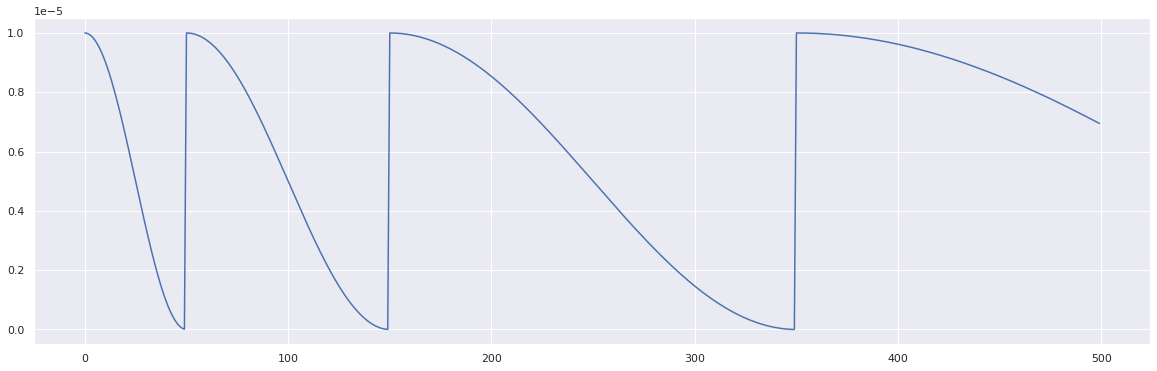

In [3]:
ep_num_transf = 500


rng = [i for i in range(ep_num_transf)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

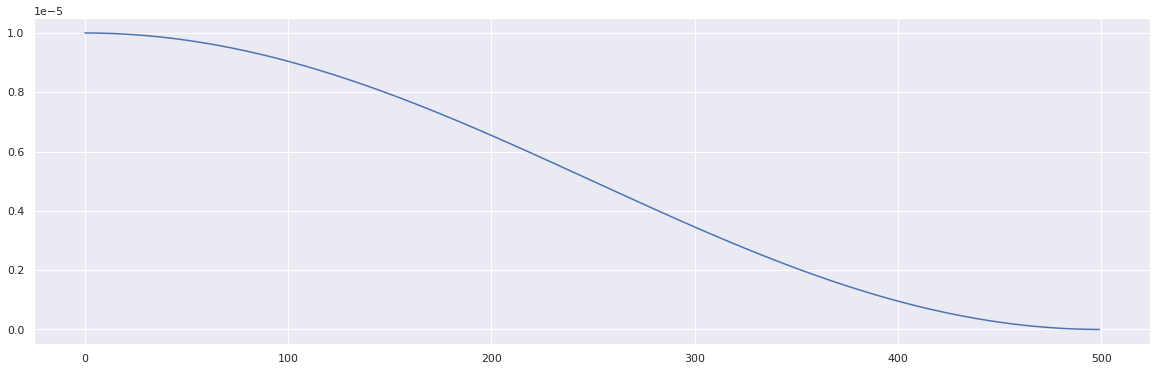

In [4]:
initial_learning_rate = 1e-5
first_decay_steps = 500


lr_decayed_fn = (
  tf.keras.optimizers.schedules.CosineDecayRestarts(
      initial_learning_rate,
      first_decay_steps))

ep_num_transf = 500


rng = [i for i in range(ep_num_transf)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

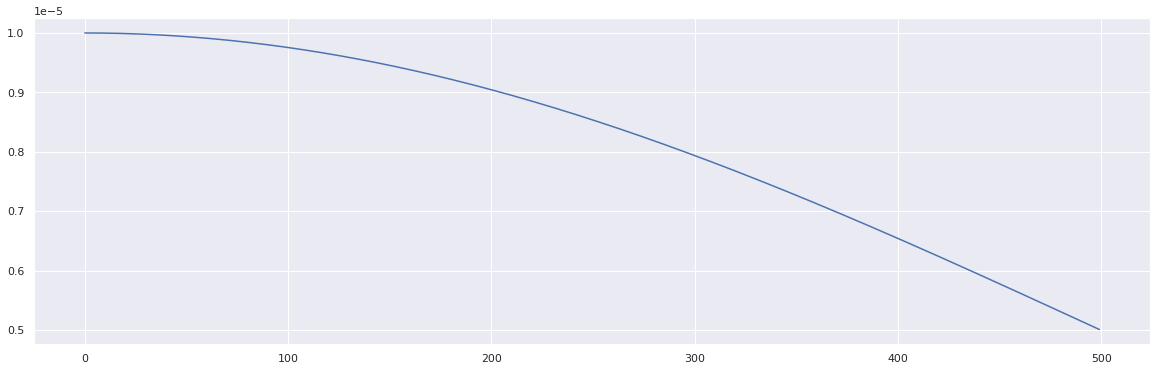

In [5]:
initial_learning_rate = 1e-5
first_decay_steps = 1000


lr_decayed_fn = (
  tf.keras.optimizers.schedules.CosineDecayRestarts(
      initial_learning_rate,
      first_decay_steps))

ep_num_transf = 500


rng = [i for i in range(ep_num_transf)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

# warm up

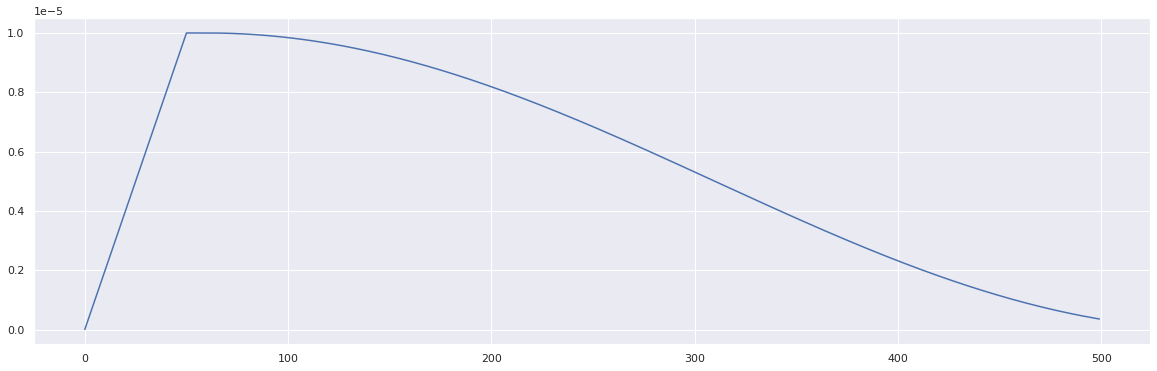

In [16]:
# Add warm up afore the CDR


def warmup_CosineDecayRestarts(epoch):
    initial_learning_rate = 1e-5
    first_decay_steps = 500
    
    lr_decayed_fn = (
      tf.keras.optimizers.schedules.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps))
        
    # warm up
    step_size = 25 # currently best for foot pp
    max_lr = initial_learning_rate #0.01 # currently best for foot pp
    base_lr = 1e-8 # 1e-6 1e-7

    # warm up
    lr_init_ep = 0
    lr_ramp_ep = 50
    lr_sus_ep  = 10
    lr_decay   = 0.5
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr
    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = max_lr
    else:
        lr = lr_decayed_fn(epoch-lr_ramp_ep-lr_sus_ep)

    return lr


ep_num_transf = 500
rng = [i for i in range(ep_num_transf)]
y = [warmup_CosineDecayRestarts(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)


In [19]:
print('{} ~ {}'.format(min(y), max(y)))

1e-08 ~ 1e-05


In [17]:
# ep_num_transf = 500
# rng = [i for i in range(ep_num_transf)]
# y = [warmup_CosineDecayRestarts(x) for x in rng]

In [18]:
# print(y)